## Diffusion equation

The initial-boundary value problem for 1D diffusion
To obtain a unique solution of the diffusion equation, or equivalently, to apply numerical methods, we need initial and boundary conditions. The diffusion equation goes with one initial condition $ u(x, 0)=I(x) $, where $ I $ is a prescribed function. One boundary condition is required at each point on the boundary, which in 1D means that $u$ must be known, $ u_{x} $ must be known, or some combination of them.

We shall start with the simplest boundary condition: $ u=0 $. The complete initial-boundary value diffusion problem in one space dimension can then be specified as
\begin{equation}
\begin{array}{c}
\frac{\partial u}{\partial t}=\alpha \frac{\partial^{2} u}{\partial x^{2}}+f, \quad x \in(0, L), t \in(0, T] \\
u(x, 0)=I(x), \quad x \in[0, L] \\
u(0, t)=0, \quad t>0, \\
u(L, t)=0, \quad t>0 .
\end{array}
\end{equation}
With only a first-order derivative in time, only one initial condition is needed, while the second-order derivative in space leads to a demand for two boundary conditions. We have added a source term $ f=f(x, t) $, which is convenient when testing implementations.

Diffusion equations have a wide range of applications throughout physical, biological, and financial sciences. One of the most common applications is propagation of heat, where $ u(x, t) $ represents the temperature of some substance at point $ x $ and time $ t $. 

The first step in the discretization procedure is to replace the domain $ [0, L] \times[0, T] $ by a set of mesh points. Here we apply equally spaced mesh points
\begin{equation}
x_{i}=i \Delta x, \quad i=0, \ldots, N_{x},
\end{equation}
and
\begin{equation}
t_{n}=n \Delta t, \quad n=0, \ldots, N_{t} .
\end{equation}
Moreover, $ u_{i}^{n} $ denotes the mesh function that approximates $ u\left(x_{i}, t_{n}\right) $ for $ i=0, \ldots, N_{x} $ and $ n=0, \ldots, N_{t} $. Requiring the PDE to be fulfilled at a mesh point $ \left(x_{i}, t_{n}\right) $ leads to the equation
\begin{equation}
\frac{\partial}{\partial t} u\left(x_{i}, t_{n}\right)=\alpha \frac{\partial^{2}}{\partial x^{2}} u\left(x_{i}, t_{n}\right)+f\left(x_{i}, t_{n}\right),
\end{equation}
The next step is to replace the derivatives by finite difference approximations. The computationally simplest method arises from using a forward difference in time and a central difference in space:

\begin{equation}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\alpha \frac{u_{i+1}^{n}-2 u_{i}^{n}+u_{i-1}^{n}}{\Delta x^{2}}+f_{i}^{n} .
\end{equation}
We have turned the PDE into algebraic equations, also often called discrete equations. The key property of the equations is that they are algebraic, which makes them easy to solve. As usual, we anticipate that $ u_{i}^{n} $ is already computed such that $ u_{i}^{n+1} $ is the only unknown. Solving with respect to this unknown is easy:
\begin{equation}
u_{i}^{n+1}=u_{i}^{n}+F\left(u_{i+1}^{n}-2 u_{i}^{n}+u_{i-1}^{n}\right)+\Delta t f_{i}^{n},
\end{equation}
where we have introduced the mesh Fourier number:
\begin{equation}
F=\alpha \frac{\Delta t}{\Delta x^{2}}
\end{equation}

In [2]:


for i in range(1, Nx):
    u[i] = u_n[i] + F*(u_n[i-1] - 2*u_n[i] + u_n[i+1]) \
           + dt*f(x[i], t[n])

    # Faster version (much faster)

u[1:Nx] = u_n[1:Nx] + F*(u_n[0:Nx-1] - 2*u_n[1:Nx] + u_n[2:Nx+1]) \
          + dt*f(x[1:Nx], t[n])
# or
u[1:-1] = u_n[1:-1] + F*(u_n[0:-2] - 2*u_n[1:-1] + u_n[2:]) \
          + dt*f(x[1:-1], t[n])

NameError: name 'Nx' is not defined

Use the spatial domain $ [0, L] $, with boundary conditions $ u(0)=u(1)=0 $. Two initial conditions will be tested: a discontinuous plug,
\\begin{equation}
I(x)=\left\{\begin{array}{ll}
0, & |x-L / 2|>0.1 \\
1, & \text { otherwise }
\end{array}\right.
\end{equation}
and a smooth Gaussian function,
\begin{equation}
I(x)=e^{-\frac{1}{2 \sigma^{2}}(x-L / 2)^{2}} .
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [29]:

def gaussian_IC(L,x, sigma):
    return np.e**(-1/(2*sigma**2) *(x-L/2)**2)

def plug_IC(x, L):
    if np.abs(x - (L/2)) > 0.1:
        return 0
    else:
        return 1

def evolve(alpha, L, sigma, Nx, Nt, t_final, IC):
    t= np.linspace(0,t_final, Nt)
    X = np.linspace(0,L,Nx+2)
    dt = t_final/Nt
    dx = 1/Nx
    F = alpha*dt/(dx**2)
    if IC=="gaussian":
        u_n = [gaussian_IC(L,x, sigma) for x in X]
        for t in range(1, Nt):
            u_next = u_n.copy()
            for i in range(1, Nx):
                u_next[i] = u_n[i] + F*(u_n[i-1] - 2*u_n[i] + u_n[i+1]) 
            u_next[0] = 0   
            u_next[-1] = 0  
            u_n = u_next
    if IC=="plug":
        u_n = [plug_IC(x,L) for x in X]
        for t in range(1, Nt):
            u_next = u_n.copy()
            for i in range(1, Nx):
                u_next[i] = u_n[i] + F*(u_n[i-1] - 2*u_n[i] + u_n[i+1]) 
            u_next[0] = 0   
            u_next[-1] = 0  
            u_n = u_next



    return u_n


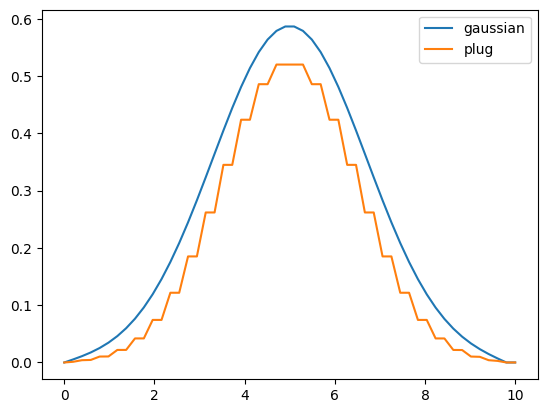

In [38]:
phi_g = evolve(0.01, 1, 0.1, 50,50, 1, "gaussian")
phi_p = evolve(0.01, 1, 0.1, 50,50, 1, "plug")
x = np.linspace(0,10,52)
plt.plot(x,phi_g,label="gaussian")
plt.plot(x,phi_p,label="plug")
plt.legend()